# Salary Dataset

### Importing necessary libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,classification_report 

### Reading CSV file 

In [2]:
df= pd.read_csv(r'C:\Users\Windows\Desktop\projects\adult.data')

### Quick View of the dataset 

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# EDA 

In [7]:
# Making the datset relevant to our model training 

In [8]:
df.columns = df.columns.str.strip()
df.drop(columns=['39', '77516', '13', '2174', '0', '40'], inplace=True)

In [9]:
df.head()

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State-gov      32560 non-null  object
 1   Bachelors      32560 non-null  object
 2   Never-married  32560 non-null  object
 3   Adm-clerical   32560 non-null  object
 4   Not-in-family  32560 non-null  object
 5   White          32560 non-null  object
 6   Male           32560 non-null  object
 7   United-States  32560 non-null  object
 8   <=50K          32560 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


#### before dividing our dataset into x and y let's make it compatible to our model ie mapping it from categorical to numerical (encodding).

In [11]:
le = LabelEncoder()

In [12]:
for col in df.columns:
    df[col]=le.fit_transform(df[col])

In [13]:
df.head()

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,6,9,2,4,0,4,1,39,0
1,4,11,0,6,1,4,1,39,0
2,4,1,2,6,0,2,1,39,0
3,4,9,2,10,5,2,0,5,0
4,4,12,2,4,5,4,0,39,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   State-gov      32560 non-null  int32
 1   Bachelors      32560 non-null  int32
 2   Never-married  32560 non-null  int32
 3   Adm-clerical   32560 non-null  int32
 4   Not-in-family  32560 non-null  int32
 5   White          32560 non-null  int32
 6   Male           32560 non-null  int32
 7   United-States  32560 non-null  int32
 8   <=50K          32560 non-null  int32
dtypes: int32(9)
memory usage: 1.1 MB


#### Now all our data has been transformed into numeric making it easier to adapt 

### Renaming Columns 

In [15]:
df.columns = ['State_gov', 'Bachelors', 'Martial_Status', 'Adm','Not_in_family','Race','Gender','Country','Salary']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   State_gov       32560 non-null  int32
 1   Bachelors       32560 non-null  int32
 2   Martial_Status  32560 non-null  int32
 3   Adm             32560 non-null  int32
 4   Not_in_family   32560 non-null  int32
 5   Race            32560 non-null  int32
 6   Gender          32560 non-null  int32
 7   Country         32560 non-null  int32
 8   Salary          32560 non-null  int32
dtypes: int32(9)
memory usage: 1.1 MB


In [17]:
df.head()

,State_gov,Bachelors,Martial_Status,Adm,Not_in_family,Race,Gender,Country,Salary
0,6,9,2,4,0,4,1,39,0
1,4,11,0,6,1,4,1,39,0
2,4,1,2,6,0,2,1,39,0
3,4,9,2,10,5,2,0,5,0
4,4,12,2,4,5,4,0,39,0


### Checking for null Values 

In [18]:
df.isnull().sum().sort_values(ascending = False)

State_gov         0
Bachelors         0
Martial_Status    0
Adm               0
Not_in_family     0
Race              0
Gender            0
Country           0
Salary            0
dtype: int64

### Checking Target Class weight 

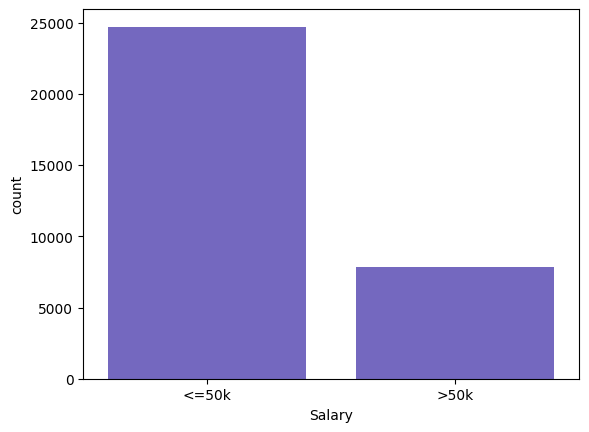

In [19]:
sns.countplot(x='Salary',data=df , color='SlateBlue')
plt.xticks(ticks=[0,1], labels=['<=50k','>50k'])
plt.show()

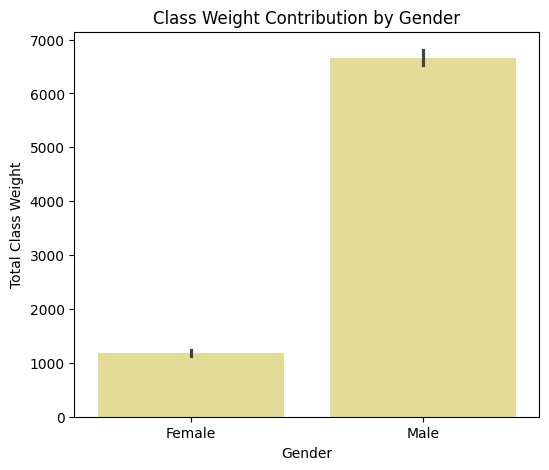

In [20]:
plt.figure(figsize=(6,5))
sns.barplot(x='Gender', y='Salary', data=df, estimator=sum,color ='Khaki')
plt.title('Class Weight Contribution by Gender')
plt.ylabel('Total Class Weight')
plt.xlabel('Gender')
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.show()

### Dividing the Dataset into Target(x) and Features(y)

In [21]:
x=df.drop('Salary',axis=1)
y=df['Salary']

### Using PCA to reduce dimensions without losing variance 

In [22]:
pca = PCA(n_components=3)

In [23]:
x_pca=pca.fit_transform(x)

### Spilitting the data into training and testing sets 

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,train_size=0.25,random_state=42,stratify=y)

In [25]:
x_train.shape , y_train.shape

((8140, 3), (8140,))

## Model benchmarking (LR,RandomForest,SVM , XGboost etc)

# Logistic Regression

In [26]:
lr = LogisticRegression(class_weight='balanced')

### Model training 

In [27]:
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

### Model Prediction

In [28]:
y_pred=lr.predict(x_test)

### Model Evaluation 

In [29]:
accuracy = accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [30]:
print('Accuracy:', accuracy),
print(report)

Accuracy: 0.5373464373464374
              precision    recall  f1-score   support

           0       0.80      0.53      0.63     18539
           1       0.28      0.57      0.37      5881

    accuracy                           0.54     24420
   macro avg       0.54      0.55      0.50     24420
weighted avg       0.67      0.54      0.57     24420



# Let's Look with RandomForest 

In [31]:
rclf=RandomForestClassifier(n_estimators = 10,random_state=42)

In [32]:
rclf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [33]:
y_pred=rclf.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8014742014742015

In [35]:
report=classification_report(y_test,y_pred)

In [36]:
report

'              precision    recall  f1-score   support\n\n           0       0.85      0.90      0.87     18539\n           1       0.61      0.48      0.54      5881\n\n    accuracy                           0.80     24420\n   macro avg       0.73      0.69      0.71     24420\nweighted avg       0.79      0.80      0.79     24420\n'

much better! 😎

## Trying XGBOOST (classifier)

In [37]:
xgbc = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    scale_pos_weight=1,
    objective='binary:logistic'
)

In [38]:
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred=xgbc.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8044226044226044

### Since RandomForest and XGboost have almost similar accuracy , we will continue with Random Forest , Now we will be using Hyperparameter Tuning to enhance the model performance to great extent ! 

# HYPERPARAMETER TUNING 

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
rf = RandomForestClassifier(random_state=42)

In [44]:
grid_search = GridSearchCV(estimator=rf,
                            param_grid=param_grid,
                            scoring='accuracy',  
                            cv=4,                # Number of cross-validation folds
                            verbose=2,
                            n_jobs=-1)           # Use all available cores

In [45]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [46]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-validation Score: 0.8090909090909091


# FINAL MODEL 

In [47]:
best_rf = grid_search.best_estimator_ 

# Fitting the best model on the training data
best_rf.fit(x_train, y_train)

# Evaluating on the test set
test_accuracy = best_rf.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8130630630630631


YAY !! 😎👍✨

# Let's  Save and Dump models 

In [55]:
import pickle

# Save RandomForest model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Save PCA
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)
